In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report


In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
def plot_sample(x,y,index):
  plt.figure(figsize=(14,2))
  plt.imshow(x[index])
  plt.xlabel(y[index])


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


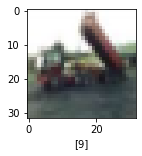

In [8]:
plot_sample(x_train,y_train,2)

In [10]:
#normalize
x_train=x_train/255
x_test=x_test/255

In [12]:
#model
cnn=models.Sequential()

#feature extraction
cnn.add(layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)))
cnn.add(layers.MaxPooling2D(2,2))
                       
cnn.add(layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
cnn.add(layers.MaxPooling2D(2,2))

#classification
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64,activation='relu'))
cnn.add(layers.Dense(10))


In [13]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [15]:
cnn.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
cnn.fit(x_train,y_train,epochs=25,validation_data=(x_train,y_train))

Epoch 1/25
1563/1563 [==============================] - 95s 60ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/25
1563/1563 [==============================] - 90s 58ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/25
1563/1563 [==============================] - 92s 59ms/step - loss: 2.3028 - accuracy: 0.0964 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/25
1563/1563 [==============================] - 91s 58ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/25
1563/1563 [==============================] - 91s 58ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/25
1563/1563 [==============================] - 91s 58ms/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/25
1563/1563 [==============================] - 90s 57ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3027 -

In [17]:
y_pred=cnn.predict(x_test)

In [18]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302618980407715, 0.10000000149011612]

In [19]:
y_test=y_test.reshape(-1)
y_pred=cnn.predict(x_test)

In [20]:
y_classes=[np.argmax(element) for element in y_pred]
print("classification report :\n",classification_report(y_test,y_classes))

classification report :
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
